<a href="https://colab.research.google.com/github/Hsynyvz/Coursera/blob/main/2_week_Copy_of_Coding_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model
model = Sequential([Flatten(input_shape = (28,28)),
                    Dense(16, activation="relu", name = "layer_1"),
                    Dense(16, activation="relu"),
                    Dense(10),
                    Softmax()])


In [ ]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax_1 (Softmax)          (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [ ]:
# Build the Sequential convolutional neural network model

model = Sequential([Conv2D(16, 3, padding="SAME", strides=2,  input_shape = (28, 28, 1), activation="relu"),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(10, activation="softmax")])

In [ ]:
# Print the model summary

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 8,010
Trainable params: 8,010
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [ ]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer="Adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Print the resulting model attributes
model.loss ,model.metrics, model.optimizer


('sparse_categorical_crossentropy',
 [],
 <tensorflow.python.keras.optimizer_v2.adam.Adam at 0x7f5853615dd0>)

***
<a id="coding_tutorial_4"></a>
## The fit method

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [ ]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [ ]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [ ]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
train_labels[0]

9

In [ ]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images /255.
test_images =test_images / 255.

0

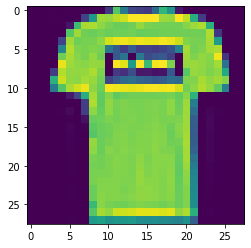

In [ ]:
# Display one of the images
plt.imshow(train_images[1])
train_labels[1]

#### Fit the model

In [ ]:
# Fit the model
history = model.fit(train_images[...,np.newaxis], train_labels ,epochs=8 , batch_size=256)


Epoch 1/8
235/235 [==============================] - 1s 3ms/step - loss: 1.3630 - accuracy: 0.5503
Epoch 2/8
235/235 [==============================] - 1s 3ms/step - loss: 0.5843 - accuracy: 0.7957
Epoch 3/8
235/235 [==============================] - 1s 3ms/step - loss: 0.5057 - accuracy: 0.8205
Epoch 4/8
235/235 [==============================] - 1s 3ms/step - loss: 0.4600 - accuracy: 0.8391
Epoch 5/8
235/235 [==============================] - 1s 3ms/step - loss: 0.4533 - accuracy: 0.8383
Epoch 6/8
235/235 [==============================] - 1s 3ms/step - loss: 0.4299 - accuracy: 0.8484
Epoch 7/8
235/235 [==============================] - 1s 3ms/step - loss: 0.4076 - accuracy: 0.8577
Epoch 8/8
235/235 [==============================] - 1s 3ms/step - loss: 0.3981 - accuracy: 0.8587


#### Plot training history

In [ ]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy
0,0.941866,0.691250
1,0.555802,0.804700
2,0.492061,0.826667
3,0.459031,0.839300
4,0.438988,0.844600


<function matplotlib.pyplot.show>

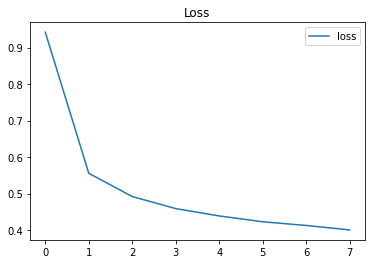

In [ ]:
# Make a plot for the loss

loss_plot = df.plot(y ="loss", title = "Loss")
plt.show

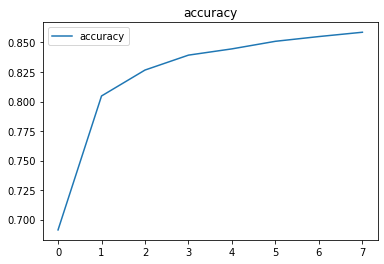

In [ ]:
# Make a plot for the accuracy

plot_accuracy = df.plot(y = "accuracy", title = "accuracy")

In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model
model.evaluate(test_images[...,np.newaxis], test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.4260 - accuracy: 0.8448


[0.4260055720806122, 0.8447999954223633]

#### Make predictions from the model

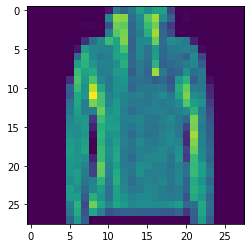

Label: Coat


In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:

test_images.shape



(10000, 28, 28)

In [ ]:
# Get the model predictions

prediction = model.predict(test_image[np.newaxis,:,:,np.newaxis])
labels[np.argmax(prediction)]

'Pullover'